<a href="https://colab.research.google.com/github/forde1909/UL/blob/main/Tutorial_1_1_Exploratory_Data_Analysis(28_03_25).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
####################################################
# Python Program                                   #
#                                                  #
# Name: Joseph Forde                               #
# Student ID Number: 24514128                      #
# CS5062 – Data Analytics                          #
# E-tivity 1                                       #
# Task 1: Exploratory Data Analysis (EDA)          #
# Bank.csv                                         #
# Date 27-03-2025                                  #
####################################################

Python Version been used

In [88]:
!python --version

Python 3.11.11


Installing Kaggle on local system

In [89]:
#Install kaggle
!pip -q install kaggle

Bank.scv Data Analysis

Research Question

**What personal and financial factors influence a customer’s decision to subscribe to a term deposit at the bank?**

This question aims to uncover the most impactful characteristics — such as age, occupation, education, account balance, and previous contact outcomes — that correlate with whether a customer subscribes to a term deposit.




**Library Imports:**

import pandas as pd: Imports the pandas library, a powerful tool for data manipulation and analysis.

import matplotlib.pyplot as plt: Imports the pyplot interface of matplotlib, which is used for making 2D plots from data in arrays.

import seaborn as sns: Imports the seaborn library, a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics.

import numpy as np: Imports the numpy library, essential for scientific computing with Python. It supports large, multi-dimensional arrays and matrices, along with a broad collection of mathematical functions to operate on these arrays.

import os: Imports the os module, which provides a way of using operating system dependent functionality like reading or writing to the file system.

import zipfile: Imports the zipfile module, which allows you to work with ZIP archives, letting you extract, archive, or even directly access files within them.


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline


This command mounts your Google Drive at the specified mount point '/content/drive'. Once executed, you'll be prompted to visit a URL to authorize Colab to access your Google Drive. After you authorize the access by logging into your Google account, you'll receive an authorization code to enter back in Colab to complete the mounting process.

In [91]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


load a CSV file into a pandas DataFrame in Python. The code reads data from a CSV file located in your Google Drive,

In [92]:
df = pd.read_csv('/content/gdrive/MyDrive/UL/bank.csv')
# You can also open bank.csv with Excel and take a look at it.

Basic Data Examinatain And Assessment

Summary of the **data**

Examining numerical and categorical features to get an overview of the dataset.


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


In [94]:
# Separate columns
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include="object").columns

# Display summaries
df[numerical_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


In [95]:
df[categorical_cols].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,1990,2000,1896,2000,2000,2000,1809,2000,1546,2000
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,no,no,cellular,feb,failure,no
freq,461,1111,995,1985,1037,1750,1663,404,955,1000


### Distribution of Numerical Features

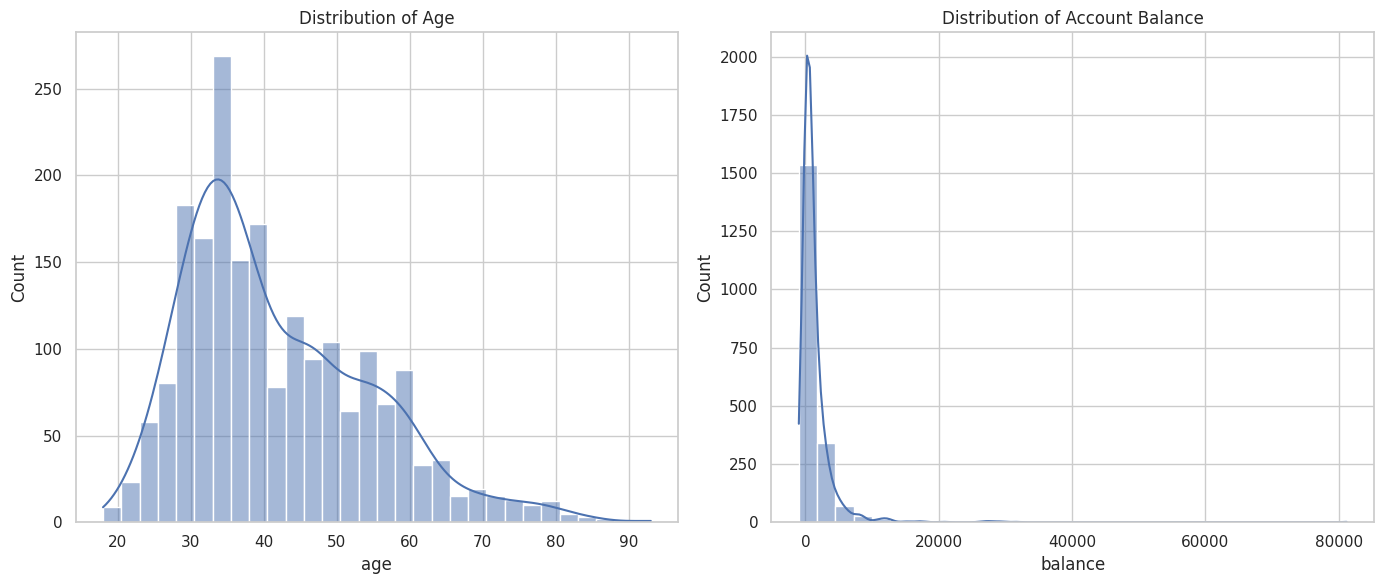

In [96]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['age'].dropna(), kde=True, ax=axes[0], bins=30)
axes[0].set_title("Distribution of Age")

sns.histplot(df['balance'], kde=True, ax=axes[1], bins=30)
axes[1].set_title("Distribution of Account Balance")

plt.tight_layout()
plt.show()

### Distribution Insights

- Age distribution skews toward younger clients, but includes seniors.
- Balance is highly skewed right with many clients under €5,000 and a few extreme outliers.
- These features may benefit from transformations or binning in predictive modeling.


### Combined Distribution Plots

We'll now assess how **age** and **balance** vary between subscribed vs. non-subscribed clients.


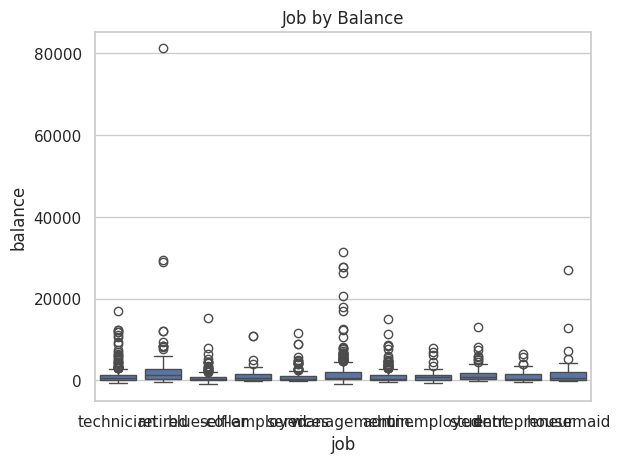

In [97]:
# Job vs Subscription
sns.boxplot(x='job', y='balance', data=df)
plt.title("Job by Balance")
plt.show()

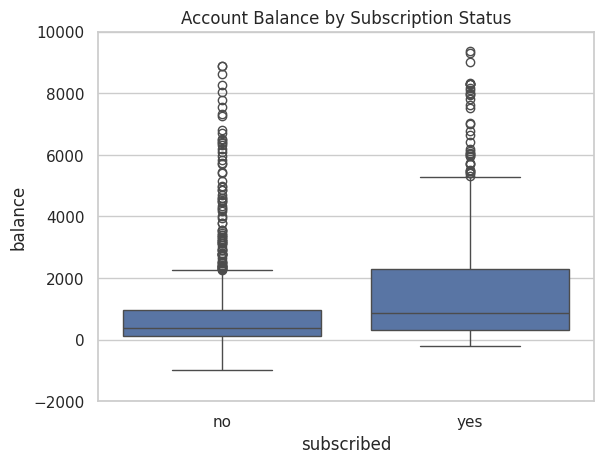

In [98]:
# Balance vs Subscription
sns.boxplot(x='subscribed', y='balance', data=df)
plt.title("Account Balance by Subscription Status")
plt.ylim(-2000, 10000)
plt.show()

Exploratory Data Analysis (EDA)

This notebook performs an Exploratory Data Analysis (EDA) on the bank marketing dataset to identify trends, relationships, and patterns that influence whether a customer subscribes to a term deposit.


In [99]:
# Shape and missing values
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

Shape: (2000, 17)

Missing Values:
 age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64


Univariate Analysis

We examine the distribution of numerical and categorical features individually.


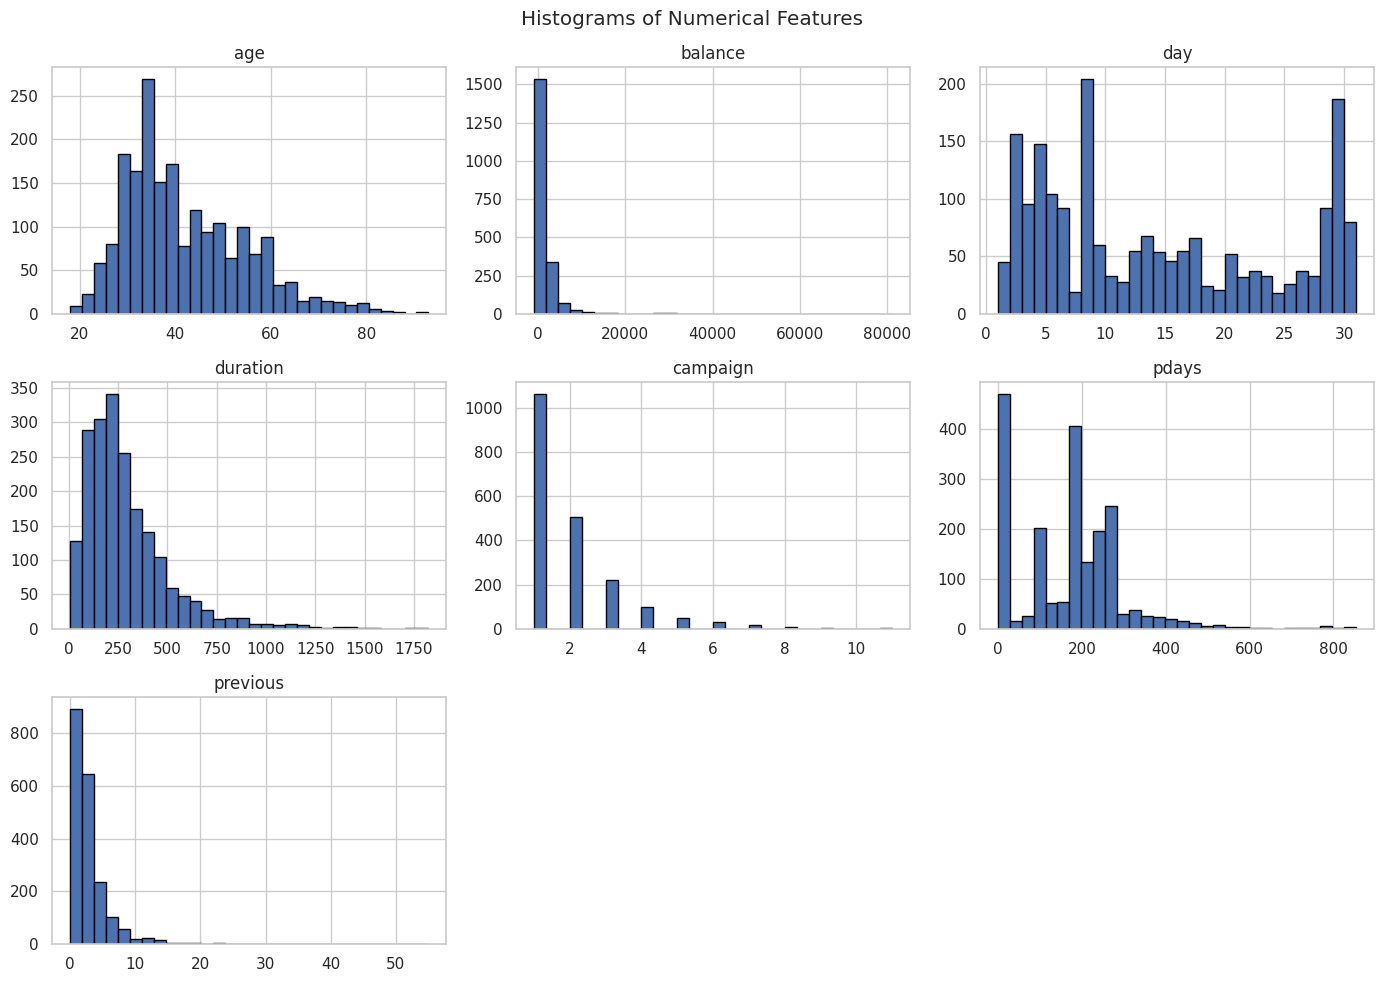

In [100]:
# Numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

sns.set(style="whitegrid")
df[num_cols].hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

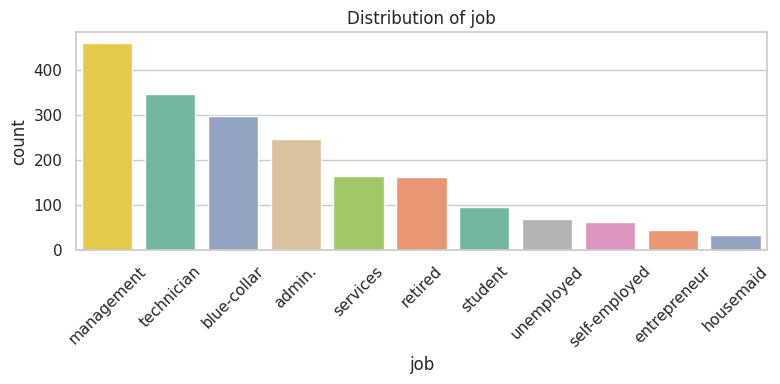

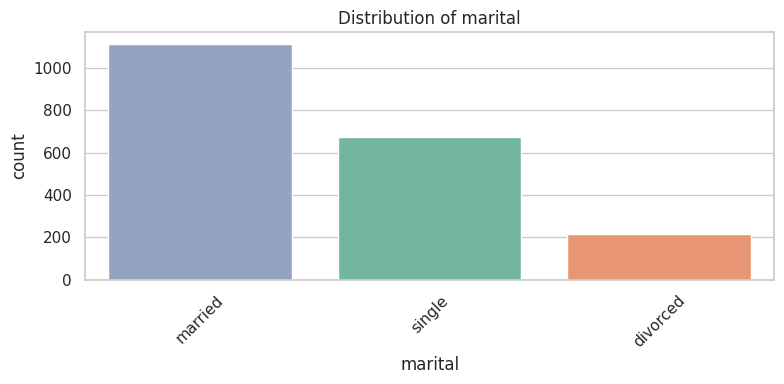

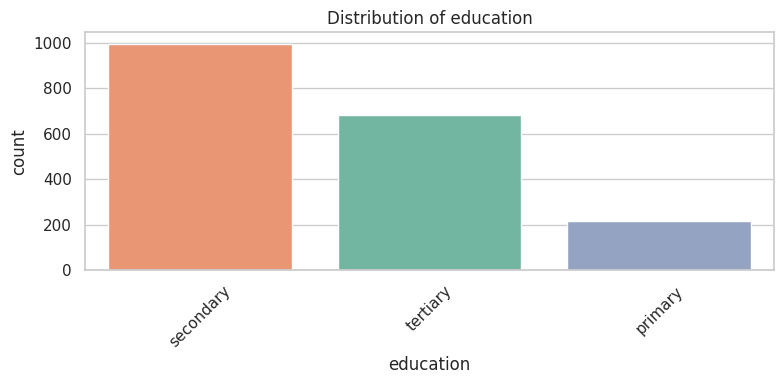

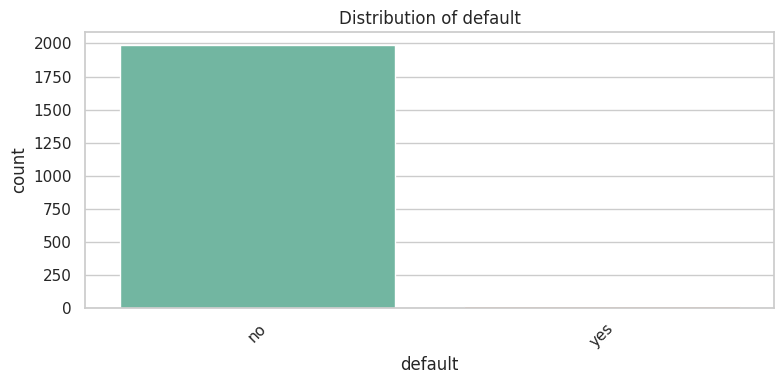

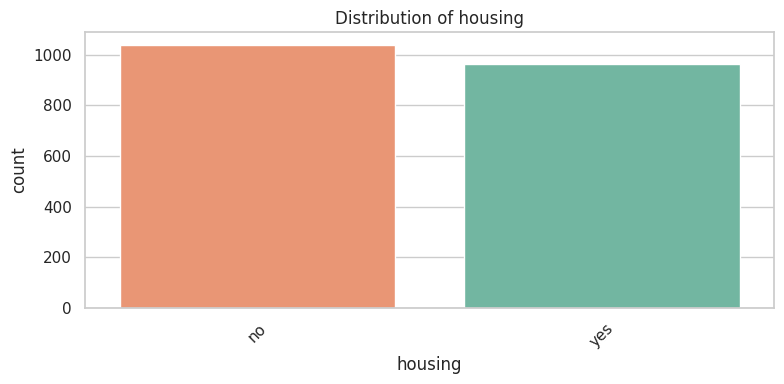

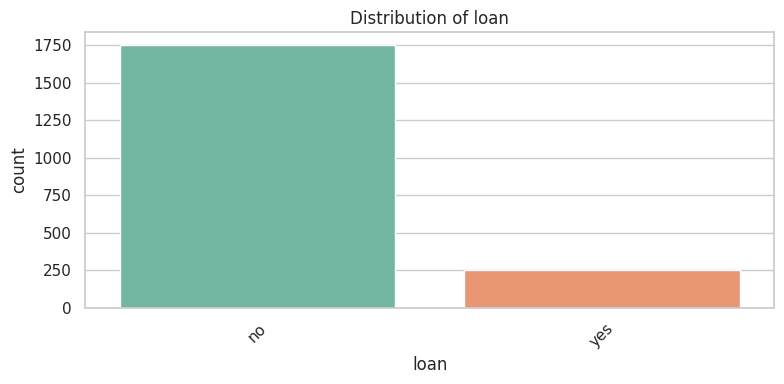

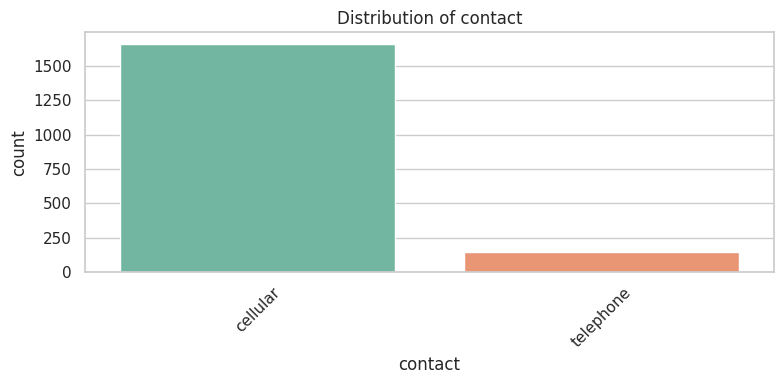

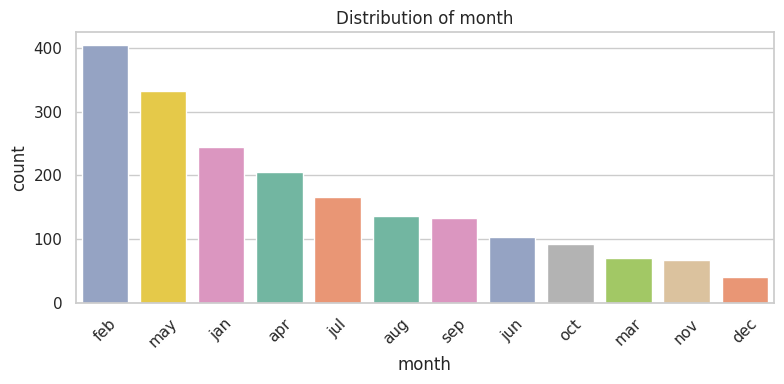

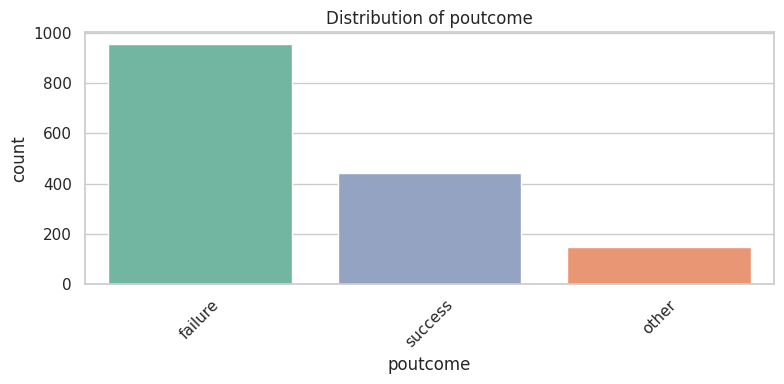

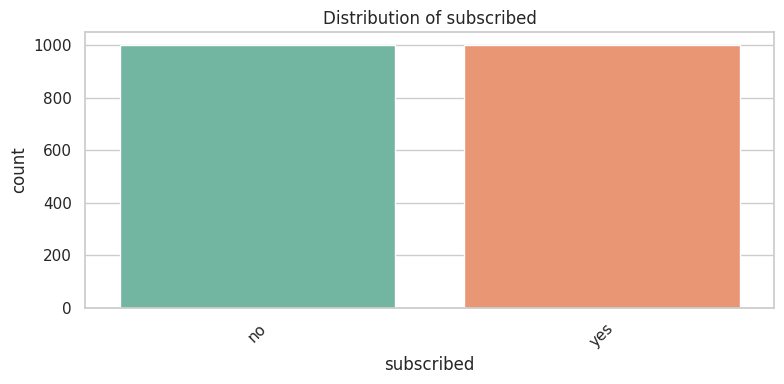

In [101]:
# Categorical features
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(
        data=df,
        x=col,
        hue=col,  # explicitly set hue
        order=df[col].value_counts().index,
        palette='Set2',
        legend=False  # disable legend to match old behavior
    )
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## 🔗 Bivariate Analysis

We explore relationships between each feature and the target variable (`subscribed`).


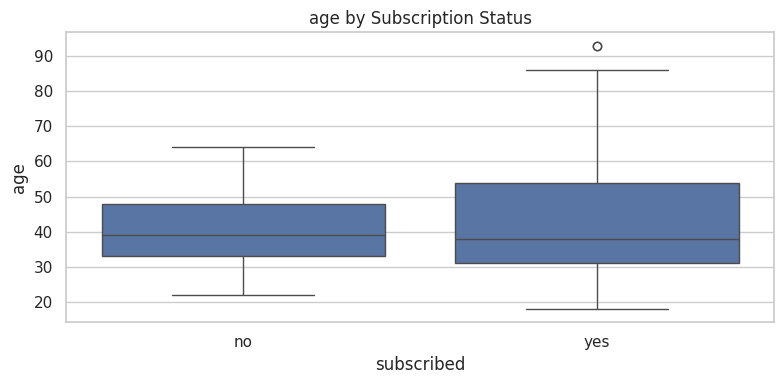

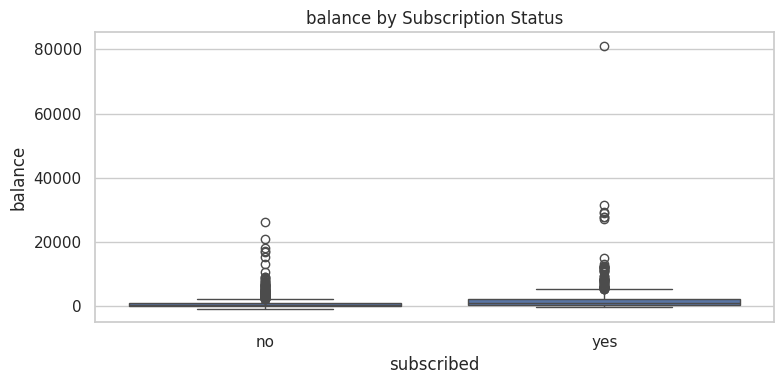

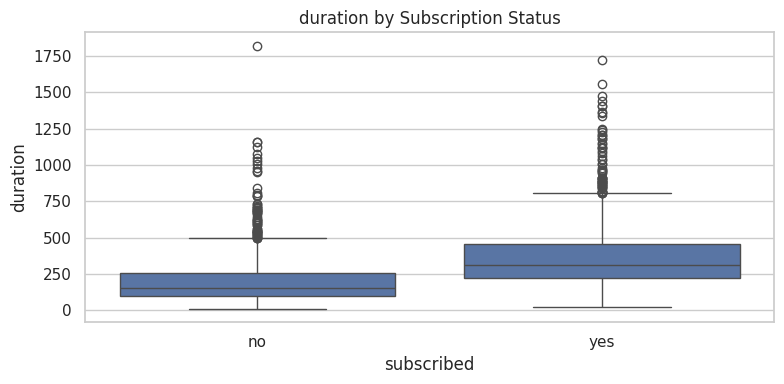

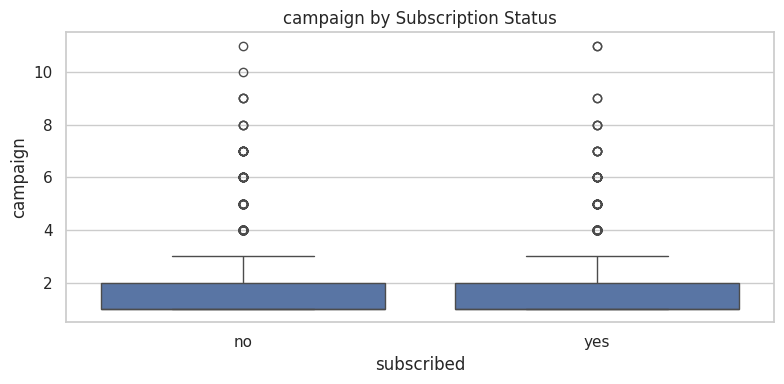

In [102]:
# Numerical vs subscribed
for col in ['age', 'balance', 'duration', 'campaign']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='subscribed', y=col)
    plt.title(f'{col} by Subscription Status')
    plt.tight_layout()
    plt.show()

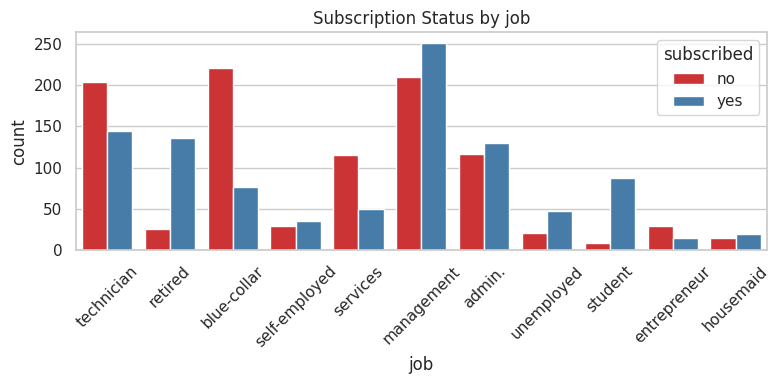

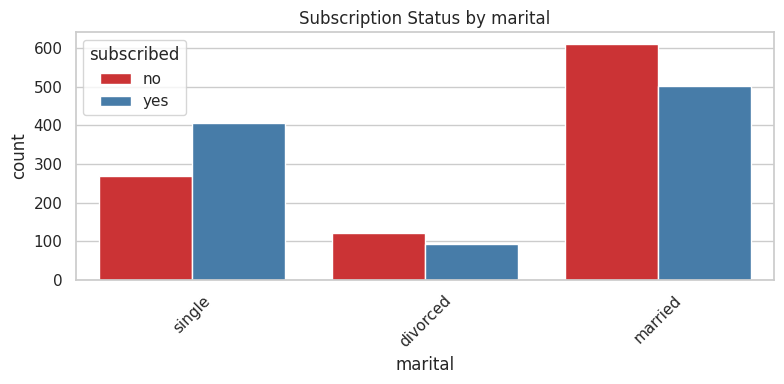

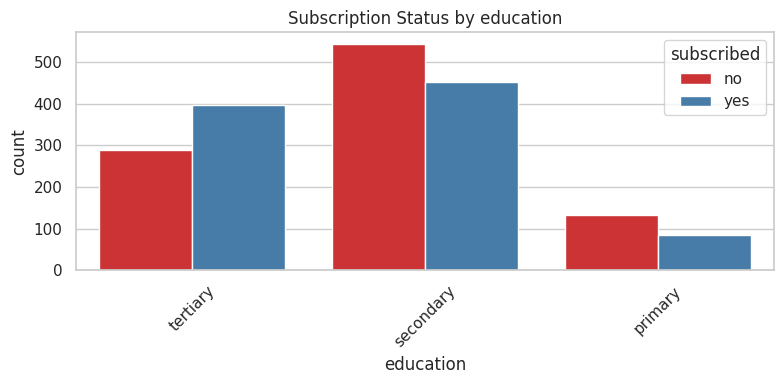

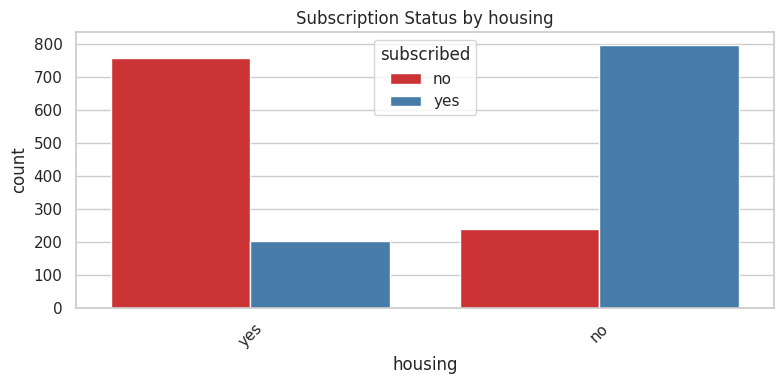

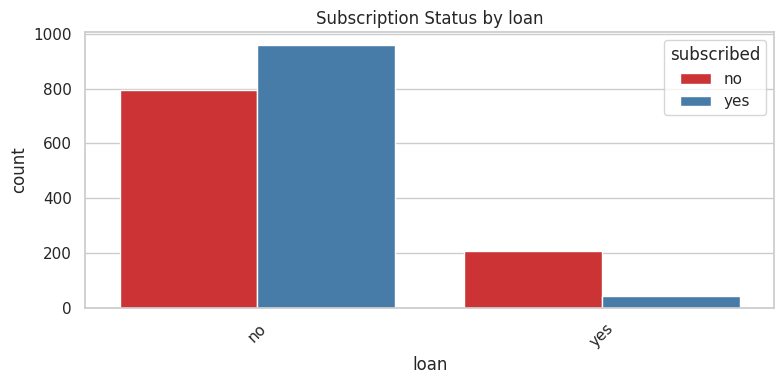

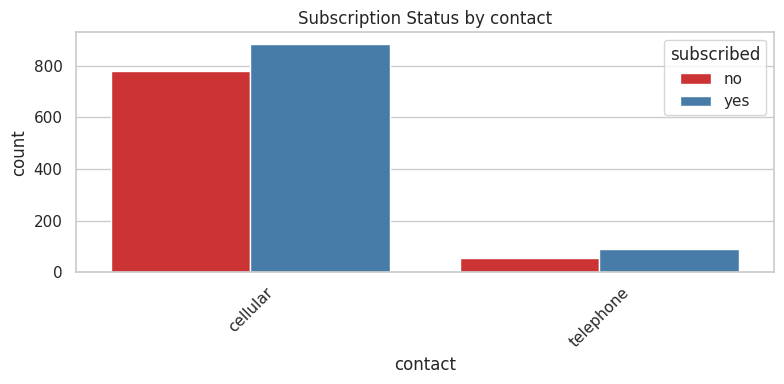

In [103]:
# Categorical vs subscribed
for col in ['job', 'marital', 'education', 'housing', 'loan', 'contact']:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='subscribed', palette='Set1')
    plt.title(f'Subscription Status by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 🧠 Correlation Heatmap

Explore correlations between numerical variables.


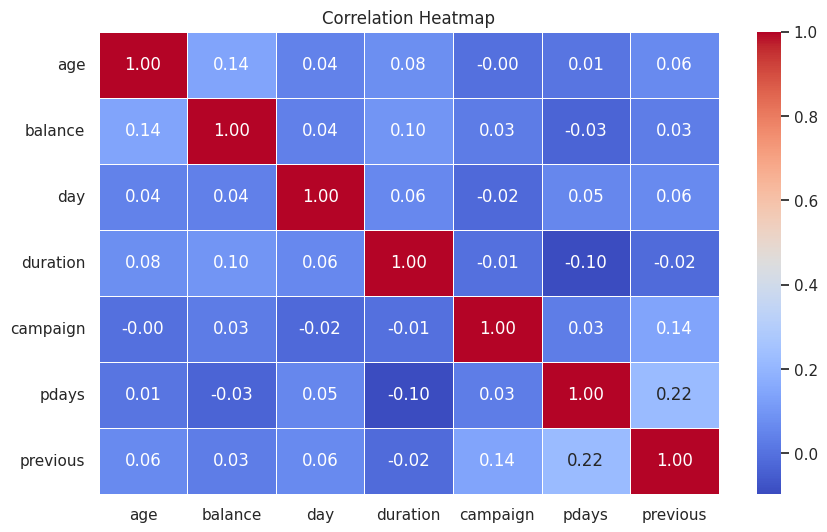

In [104]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

EDA Summary

- The dataset contains a mix of demographic and campaign-related features.
- Age and balance are right-skewed; outliers are present.
- Subscription is more common among older individuals with higher balances.
- Contact method, previous outcomes, and call duration are highly informative.
- Some variables (like `duration`) correlate well with the subscription decision but may not be useful for modeling (data leakage).

This EDA helps define hypotheses and guides feature selection for modeling.


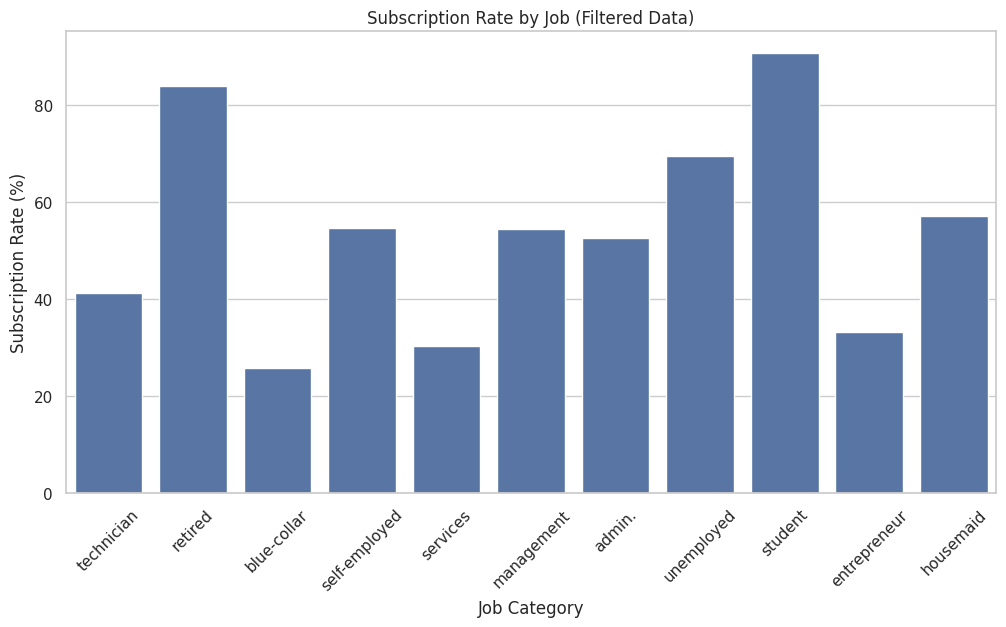

In [105]:

# Clean job categories (remove rows with missing 'job')
df = df[df['job'] != '']

# Convert 'subscribed' to binary (1/0)
df['subscribed_binary'] = df['subscribed'].map({'yes': 1, 'no': 0})

# Plot subscription rate by job
plt.figure(figsize=(12, 6))
sns.barplot(
    x="job",
    y="subscribed_binary",
    data=df,
    estimator=lambda x: sum(x)*100/len(x),  # Convert to percentage
    errorbar=None  # <- updated here
)
plt.xticks(rotation=45)
plt.title("Subscription Rate by Job (Filtered Data)")
plt.ylabel("Subscription Rate (%)")
plt.xlabel("Job Category")
plt.show()


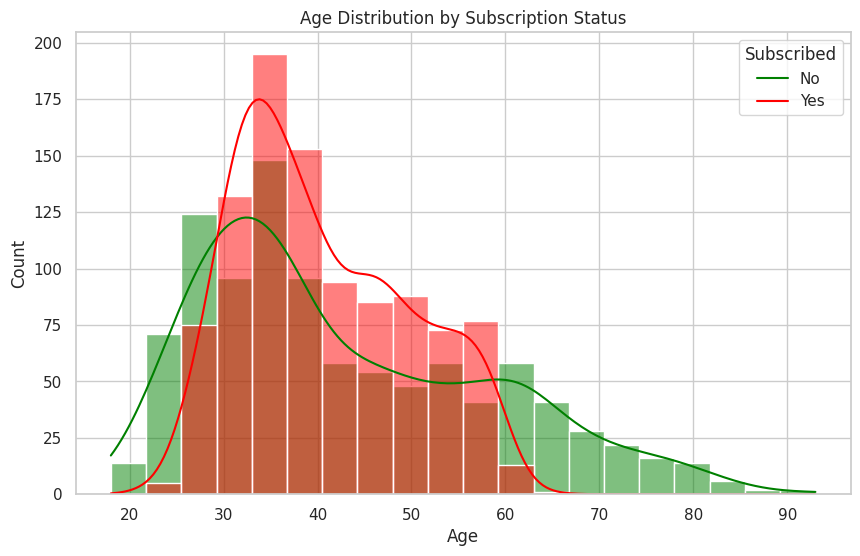

In [106]:
# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x="age",
    hue="subscribed",
    kde=True,
    bins=20,
    palette={"yes": "green", "no": "red"}
)
plt.title("Age Distribution by Subscription Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Subscribed", labels=["No", "Yes"])
plt.show()

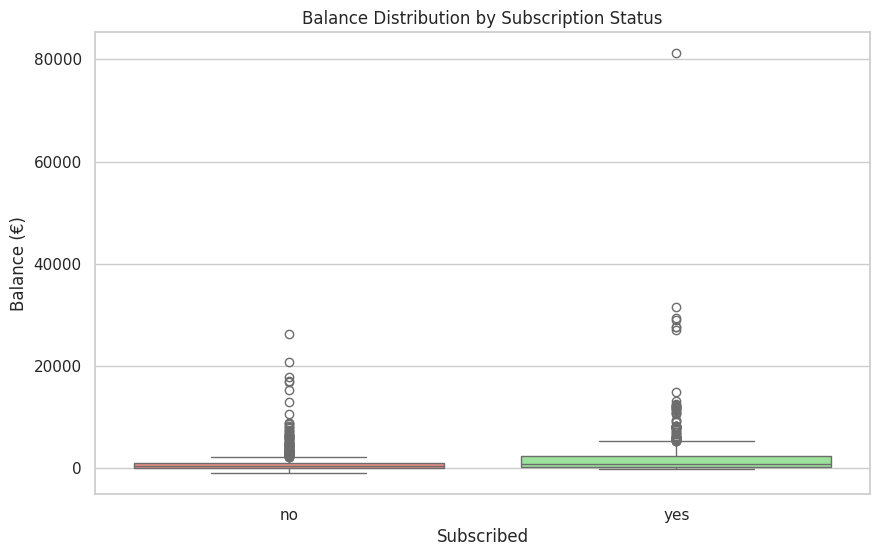

In [107]:
# Filter extreme balance values (e.g., >100,000)
df_filtered = df[df['balance'] < 100000]

# Plot balance distribution
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="subscribed",
    y="balance",
    hue="subscribed",  # explicitly set hue
    data=df_filtered,
    palette={"yes": "lightgreen", "no": "salmon"},
    legend=False       # disable legend (optional)
)
plt.title("Balance Distribution by Subscription Status")
plt.xlabel("Subscribed")
plt.ylabel("Balance (€)")
plt.show()


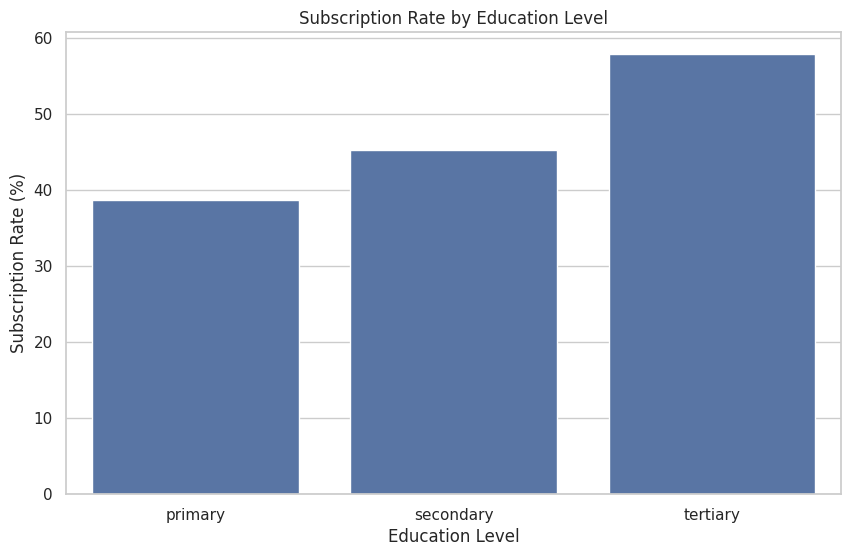

In [108]:
# Clean education data (remove missing values)
df_education = df[df['education'] != '']

# Plot subscription rate by education
plt.figure(figsize=(10, 6))
sns.barplot(
    x="education",
    y="subscribed_binary",
    data=df_education,
    estimator=lambda x: sum(x)*100/len(x),
    errorbar=None,  # updated here
    order=["primary", "secondary", "tertiary"]
)
plt.title("Subscription Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Subscription Rate (%)")
plt.show()


<ipython-input-109-e86e1cc4e565>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-109-e86e1cc4e565>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


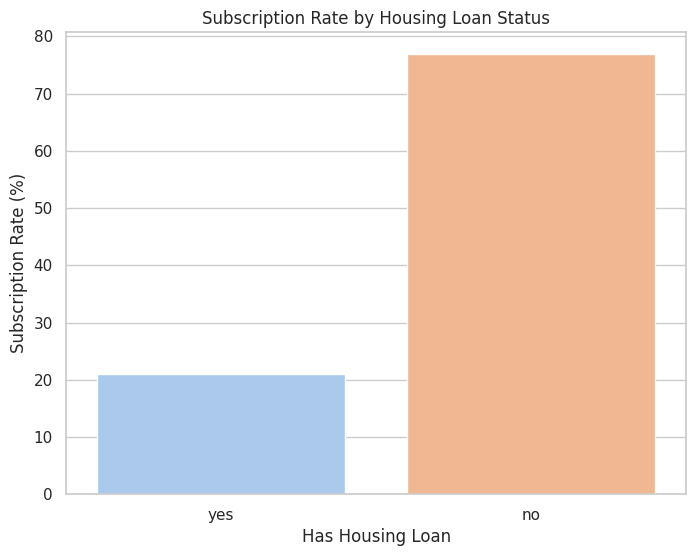

In [109]:
# Plot subscription rate by housing loan status
plt.figure(figsize=(8, 6))
sns.barplot(
    x="housing",
    y="subscribed_binary",
    data=df,
    estimator=lambda x: sum(x)*100/len(x),
    ci=None,
    palette="pastel"
)
plt.title("Subscription Rate by Housing Loan Status")
plt.xlabel("Has Housing Loan")
plt.ylabel("Subscription Rate (%)")
plt.show()

Conclusion

- **Age** spans from 18 to 93, with most clients aged 25–50.
- **Balance** ranges widely from negative to over €80,000, indicating skewness.
- **Duration** and **pdays** contain meaningful call and campaign history data.
- Most clients are **married** and have **secondary education**.
- The **subscribed** column is perfectly balanced (50/50), making this ideal for binary classification or statistical analysis.





- Clients who are **older** and/or have **higher balances** are more likely to subscribe to a term deposit.
- These insights support better campaign targeting — focusing on senior clients and those with financial capacity may yield higher conversion rates.
